In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
# pip install scikit-learn, conda install scikit-learn

clustering이란 여러개의 데이터가 있을 때 군집화 하는 것을 의미한다.  
비슷한 데이터끼리 묶어놓으면 관리하기 쉽다는 장점이 있다. 예를 들면 학원을 운영할 때 고급반, 중급반, 초급반으로 나눠 적절히 분류해서 관리한다면 활용 방안이 많아질 것이다.  
비지도 학습(unsupervised learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘이 비지도 학습에 속한다. => KMeans 알고리즘이 대표적인 비지도 학습 알고리즘이다.

In [3]:
# clustering(군집화)에 필요한 라이브러리를 import 시킨다.
from sklearn.cluster import KMeans

clustering을 실행할 데이터를 만든다.

In [4]:
df = pd.DataFrame(columns=['x', 'y'])
df.loc[0] = [2, 3]
df.loc[1] = [2, 11]
df.loc[2] = [2, 18]
df.loc[3] = [4, 5]
df.loc[4] = [4, 7]
df.loc[5] = [5, 3]
df.loc[6] = [5, 15]
df.loc[7] = [6, 6]
df.loc[8] = [6, 8]
df.loc[9] = [6, 9]
df.loc[10] = [7, 2]
df.loc[11] = [7, 4]
df.loc[12] = [7, 5]
df.loc[13] = [7, 17]
df.loc[14] = [7, 18]
df.loc[15] = [8, 5]
df.loc[16] = [8, 4]
df.loc[17] = [9, 10]
df.loc[18] = [9, 11]
df.loc[19] = [9, 15]
df.loc[20] = [9, 19]
df.loc[21] = [10, 5]
df.loc[22] = [10, 8]
df.loc[23] = [10, 18]
df.loc[24] = [12, 6]
df.loc[25] = [13, 5]
df.loc[26] = [14, 11]
df.loc[27] = [15, 6]
df.loc[28] = [15, 18]
df.loc[29] = [18, 12]
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


In [5]:
df = pd.read_csv('./data/cluster.csv')
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


In [6]:
# index: 데이터프레임의 인덱스를 얻어온다.
print(df.index)
print(list(df.index))

RangeIndex(start=0, stop=30, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [7]:
# column: 데이터프레임의 컬럼 이름을 얻어온다.
print(df.columns)

Index(['x', 'y'], dtype='object')


In [8]:
# values: 데이터프레임에 저장된 데이터만 넘파이 배열 형태로 얻어온다.
print(type(df.values))
print(df.values)
point = df.values

<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


cluctering을 실행할 데이터를 시각화한다.

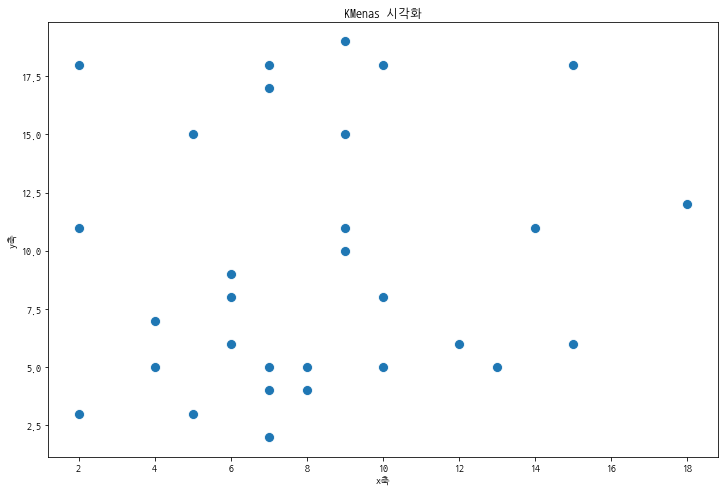

In [9]:
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('KMenas 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

KMeans를 수행하기 위해서는 클러스터링을 수행할 데이터의 주제를 결정하고 얼마나 많은 클러스터를 만들지 결정한다.  
이 때, 데이터가 정확할 수록 유리하게 클러스터링을 할 수 있고 클러스터링을 수행하는 방법은 무작위 중심(cenrtoid)값 선택, KMeans++ 법등 다양한 방법이 있다.

무작위 중심(cenrtoid)값 선택 알고리즘을 이용한 클러스터링  
중심에 가까운 데이터를 클러스터에 포함시키고 중심을 클러스터의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데 더 이상 중심의 위치가 변하지 않을 때 까지 반복하는 것이 일반적인 방법이고 이러한 과정을 거치면 결과적으로 완벽하게 군집화된 클러스터를 얻을 수 있다.

<img src="./Clustering1.png" width="1300" align="left"/>  

클러스터링을 위한 무작위 중심을 결정하는 방법은 가장 먼저 특정 노드(데이터)를 선택해서 클러스터의 중심으로 설정(파랑색)한다.  
그 후에는 선택된 노드(파랑색)에서 가장 먼 노드(노랑색)를 두 번째 클러스터의 중심으로 설정한다.  
그 다음 부터는 이미 선택된 중심점들로 부터 가장 멀리 떨어져있는 노드(녹색)를 선택해서 클러스터의 중심으로 설정한다.

<img src="./Clustering2.png" width="1300" align="left"/>  

1, 2, 3 세 개의 클러스터가 존재한다고 가정하고 하나의 데이터를 선택해서 세 개의 클러스터 중심 중에서 가장 가까운 클러스터에 속하도록 만드는 작업을 반복해서 실행한다.  
이러한 과정을 전체 데이터에 대해서 실행하면 아래 그림과 같을 것이다.

<img src="./Clustering3.png" width="1300" align="left"/>  

대략적으로 군집화가 완료되면 완벽한 군집화를 위해 중심의 위치를 데이터의 중간으로 이동시킨다.  
중심의 위치를 이동시키고 다시 모든 데이터에 대해서 어떤 클러스터에 가까운지를 하나씩 체크해서 만약 특정 데이터가 다른 클러스터의 중심에 더 가깝다면 그 클러스터에 속하도록 설정하면 된다.  
클러스터 중심의 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.

KMenas 알고리즘을 이용해서 클러스터 4개를 생성한다.

In [10]:
# sklearn 라이브러리의 KMenas() 함수를 이용해 데이터프레임의 데이터를 학습시킨다.
# KMenas() 함수의 n_clusters 속성으로 군집화 할 클러스터의 개수를 지정하고
kmeans = KMeans(n_clusters=4).fit(point)
print(kmeans)
# cluster_centers_: KMeans() 함수가 계산한 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans() 함수가 계산한 데이터가 속하는 각각의 클러스터를 얻어온다.
print(kmeans.labels_)

KMeans(n_clusters=4)
[[ 5.53846154  5.53846154]
 [ 7.         17.14285714]
 [15.66666667 13.66666667]
 [11.14285714  7.28571429]]
[0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 3 3 1 1 3 3 1 3 3 2 3 2 2]


데이터프레임에 cluster라는 열을 추가하고 군집화된 결과를 넣어준다.

In [11]:
df['cluster'] = kmeans.labels_
df

,x,y,cluster
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


In [12]:
# 데이터프레임을 csv 파일로 저장한다.
df.to_csv('./data/save.csv')

클러스터링된 결과를 시각화한다.

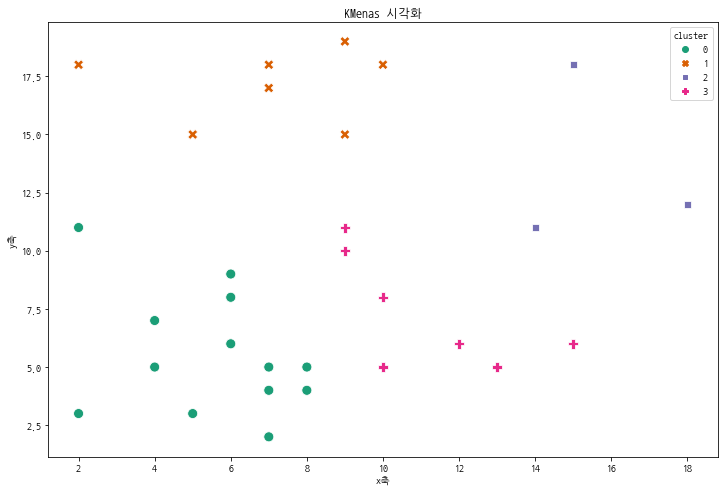

In [13]:
plt.figure(figsize=[12, 8])
# 군집화된 결과를 hue 속성에 지정해서 서로다른 색상으로 구분한다.
# 색상이 잘 구분되지 않으면 palette 속성으로 색상 팔레트를 지정하면 된다.
# 색상 팔레트 이름
# BrBG, PiYG, PRGn, PuOr, RdBu, RdGy, RdYlBu, RdYlGn, Spectral, Accent, Dark2, Paired, Pastel1, Pastel2
# Set1, Set2, Set3, Blues, BuGn, BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples
# RdPu, Reds, YlGn, YlGnBu, YlOrBr, YlOrRd
# style 속성을 사용해 scatter 모양을 다양하게 표시할 수 있다.
sns.scatterplot(data=df, x='x', y='y', s=100, hue='cluster', palette='Dark2', style='cluster')
plt.title('KMenas 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

<img src="./palette.png" width="1200" align="left"/>  